In [4]:
### Pick the file directory
'''
directory_list = ['/media/ab/data/Research_Data/Enhancers/ConservationScores/conScores/',
                    '/media/ab/data/Research_Data/Enhancers/ConservationScores/conScores/genes/',
                    '/media/ab/data/Research_Data/Enhancers/ConservationScores/conScores/nogenes/',
                    '/media/ab/data/Research_Data/Enhancers/ConservationScores/conScoresMax/',
                    '/media/ab/data/Research_Data/Enhancers/ConservationScores/conScoresMax/genes/',
                    '/media/ab/data/Research_Data/Enhancers/ConservationScores/conScoresMax/nogenes/',
                    '/media/ab/data/Research_Data/Enhancers/ConservationScores/midRegionMax15bp/genes/',
                    '/media/ab/data/Research_Data/Enhancers/ConservationScores/midRegionMax15bp/nogenes/']

directory_list = ['/media/ab/data/Research_Data/Enhancers/BedFiles/BedFiles_150bp/conScores/'
                    '/media/ab/data/Research_Data/Enhancers/BedFiles/BedFiles_150bp/genes/'
                    '/media/ab/data/Research_Data/Enhancers/BedFiles/BedFiles_150bp/nogenes/']

directory_list = ['/media/ab/data/Research_Data/Enhancers/BedFiles/BedFiles_150bp/nogenes2/']
directory_list = ['/media/ab/data/Research_Data/TP53/BedFilesMMB/MeanConScores/nogenes/Image1/',
                    '/media/ab/data/Research_Data/TP53/BedFilesMMB/MeanConScores/nogenes/Image2/',
                    '/media/ab/data/Research_Data/TP53/BedFilesMMB/MeanConScores/nogenes/Image3/',
                    '/media/ab/data/Research_Data/TP53/BedFilesMMB/MeanConScores/nogenes/Image4/']
directory_list = ['/media/ab/data/Research_Data/TP53/P53Motifs_PWMTools/sorted/P53Motifs/MeanConScores/',
                  '/media/ab/data/Research_Data/TP53/P53Motifs_PWMTools/sorted/P53Motifs/MeanConScores/genes/',
                  '/media/ab/data/Research_Data/TP53/P53Motifs_PWMTools/sorted/P53Motifs/MeanConScores/nogenes/']
'''
directory_list = ['/media/ab/data/Research_Data/TP53/BedFilesMMB/MeanConScores']

Filename =  1.EE5.pwmscan_hg19_12540_3193.sorted.bed.bedgraph
Filename =  1.EE5.pwmscan_hg19_12540_3193.sorted.promoters.bedgraph
Filename =  2.P53ChIP.Atleast5of7.sorted.bed.bedgraph
Filename =  3.P53_Nutlin.Bidirs.sorted.uniq.bed.bedgraph
Filename =  4.TP53Motifs_P53_ChIP-Seq.bed.bedgraph
Filename =  5.TP53Motifs_Bidirectionals.bed.bedgraph
Filename =  6.P53_ChIP-Seq_Bidirectionals.bed.bedgraph
Filename =  7.TP53Motifs_P53_ChIP-Seq_Bidirectionals.bed.bedgraph
Filename =  8.hg19Introns.bedgraph
Filename =  9.hg19Exons.bedgraph
Directory:  /media/ab/data/Research_Data/TP53/BedFilesMMB/MeanConScores/
Number of files:  10


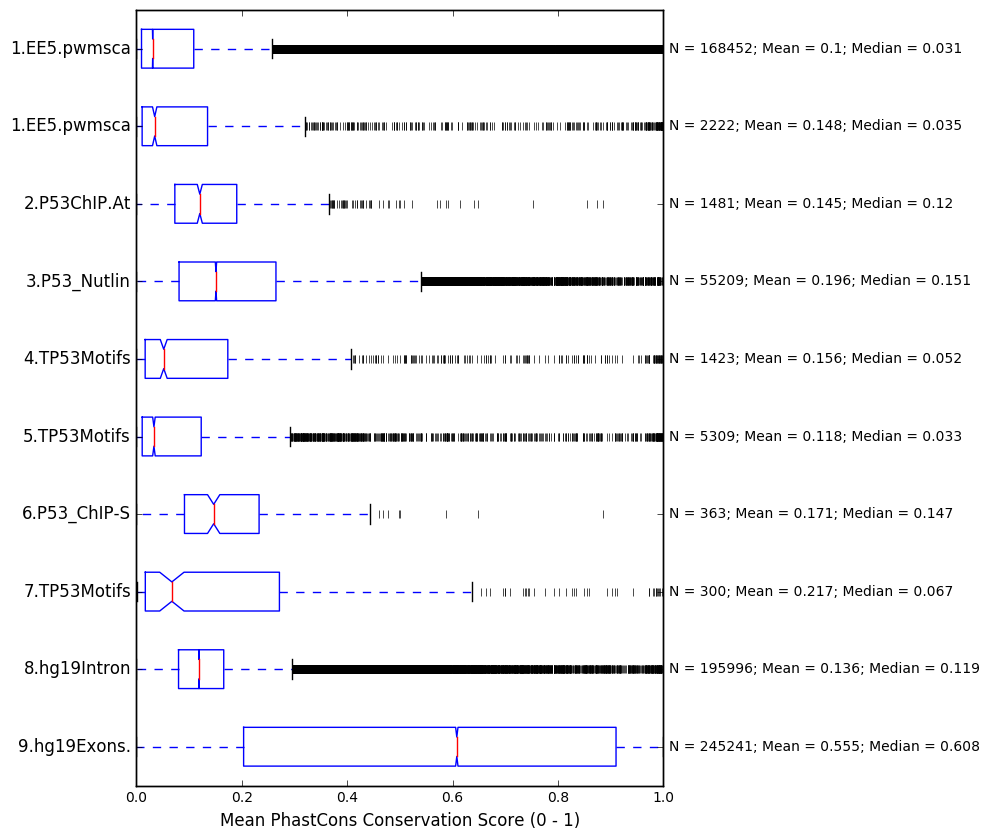

SystemExit: 

In [7]:
### This cell imports the data from a text file that contains the distances between features and sorts them
### by chromosome. It creates a histogram for each chromosome that shows the distances between the features. 

%matplotlib inline
%config InlineBackend.figure_format = 'png'
from IPython.display import SVG, display
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy
import sys
from scipy import stats
import matplotlib.ticker as mtick


def main():  
    
    for directory in directory_list:
        if directory[-1] != '/':
            directory = directory + '/'
        file_filter = '.bedgraph'
        all_data = []
        data_labels = []
        dir_list = sorted(os.listdir(directory))
        #print dir_list
        for filename in dir_list:
            conScores = []
            if filename[-(len(file_filter)):] == file_filter:      ### Load only the TSV files
                print "Filename = ", filename
                conScores = load_from_file(directory+filename)
                all_data.append(conScores)
                data_labels.append(filename)
        make_graphs(all_data, data_labels, directory)

def load_from_file(file_to_open):              
    
    nonvalues = 0
    data_col = 3
    x=open(file_to_open)   ### Open the file
    data = []                    ### Initiate the data list
    for line in x:               ### For each line in the file 
        conScore = (line.strip('\n').split('\t')[data_col])   # Split the line
        if conScore != ".":                            # Check if data is valid
            data.append(float(conScore))               # if valid, append to data
        else:
            nonvalues += 1                             # if invalid, count invalid data points
    #print "positions with no score" = ", nonvalues                    # print invalid data points
    x.close()                                       # close open file 
    return data                                       # return data from file

def make_graphs(all_data, data_labels, directory):
    
    num_files = len(data_labels)
    print "Directory: ", directory
    print "Number of files: ", num_files
    

    #avgs = []
    stats = []
    for i in all_data:
        #avgs.append(sum(i)/len(i))
        stats.append("N = "+str(len(i))+"; Mean = "+str( round(  (sum(i)/len(i)),3  )) +
                     "; Median = " + str(round(np.median(i), 3)))

    
    ### Make the subplot for the boxplot
    fig, axs = plt.subplots(figsize=(10, (num_files*.85)))
    
    ### Make the boxplot
    bp = plt.boxplot(all_data, notch=True, sym='|', whis=1.5, vert=False, showmeans=False, widths=0.5)
    
    ### Set the left axis parameters
    top = 1
    bottom = 0
    axs.set_xlim(bottom, top)
    axs.set_ylim(0.5, num_files + 0.5)
    axs.invert_yaxis()
    
    ### Set the left axis labels
    ytickNames = plt.setp(axs, yticklabels=(q[:12] for q in data_labels))
    plt.setp(ytickNames, rotation=0, fontsize=12)
    
    ### Make the right axis for the N labels
    ax2 = axs.twinx()
    
    ### Invert the right axis to match the left axis
    ax2.invert_yaxis()

    ### Find the tick positions of the left axis and use them to set positions for right axis
    ax2_tickpos = axs.get_yticks()
    ax2.set_yticks(ax2_tickpos)
    ax2.set_ybound(axs.get_ybound())
    ax2.set_yticklabels(stats)
    
    ### Show the boxplot
    axs.set_xlabel('Mean PhastCons Conservation Score (0 - 1)', fontsize=12)
    plt.tight_layout()
    #plt.savefig(directory+"boxplot.svg",format='svg')
    plt.savefig(directory+"boxplot.png",format='png')    
    plt.show()
                        

if __name__ == "__main__":
    sys.exit(main())

In [ ]:
### This cell imports the data from a text file that contains the distances between features and sorts them
### by chromosome. It creates a histogram for each chromosome that shows the distances between the features. 

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from IPython.display import SVG, display
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy
import sys
from scipy import stats
import matplotlib.ticker as mtick


def main():  
    
    for directory in directory_list:
        if directory[-1] != '/':
            directory = directory + '/'
        file_filter = '.bedgraph'
        all_data = []
        data_labels = []
        dir_list = sorted(os.listdir(directory))
        #print dir_list
        for filename in dir_list:
            conScores = []
            if filename[-(len(file_filter)):] == file_filter:      ### Load only the TSV files
                conScores = load_from_file(directory+filename)
                all_data.append(conScores)
                data_labels.append(filename)
        make_graphs(all_data, data_labels, directory)

def load_from_file(file_to_open):              
    
    nonvalues = 0
    data_col = 6
    x=open(file_to_open)   ### Open the file
    data = []                    ### Initiate the data list
    for line in x:               ### For each line in the file 
        conScore = (line.strip('\\n').split('\\t')[data_col])   # Split the line
        if conScore != \".\":                            # Check if data is valid
            data.append(float(conScore))               # if valid, append to data
        else:
            nonvalues += 1                             # if invalid, count invalid data points
    #print \"positions with no score\" = \", nonvalues                    # print invalid data points
    x.close()                                       # close open file 
    return data                                       # return data from file

def make_graphs(all_data, data_labels, directory):
    
    num_files = len(data_labels)
    print \"Directory: \", directory
    print \"Number of files: \", num_files
    

    #avgs = []
    stats = []
    for i in all_data:
        #avgs.append(sum(i)/len(i))
        stats.append(\"N = \"+str(len(i))+\"; Mean = \"+str( round(  (sum(i)/len(i)),3  )) +
                     \"; Median = \" + str(round(np.median(i), 3)))
    #print avgs
    #print ns
    
    ### Make the subplot for the boxplot
    fig, axs = plt.subplots(figsize=(15, (num_files*.85)))
    
    ### Make the boxplot
    bp = plt.violinplot(all_data, notch=True, sym='|', whis=1.5, vert=False, showmeans=False)
    
    ### Set the left axis parameters
    top = 1
    bottom = 0
    axs.set_xlim(bottom, top)
    axs.set_ylim(0.5, num_files + 0.5)
    axs.invert_yaxis()
    
    ### Set the left axis labels
    ytickNames = plt.setp(axs, yticklabels=(q[:] for q in data_labels))
    plt.setp(ytickNames, rotation=0, fontsize=12)
    
    ### Make the right axis for the N labels
    ax2 = axs.twinx()
    
    ### Invert the right axis to match the left axis
    ax2.invert_yaxis()

    ### Find the tick positions of the left axis and use them to set positions for right axis
    ax2_tickpos = axs.get_yticks()
    ax2.set_yticks(ax2_tickpos)
    ax2.set_ybound(axs.get_ybound())
    ax2.set_yticklabels(stats)
    
    ### Show the boxplot
    axs.set_xlabel('Mean PhyloP Conservation Score (-1 - 1)', fontsize=12)
    plt.tight_layout()
    plt.savefig(directory+\"boxplot.svg\",format='svg')
    plt.savefig(directory+\"boxplot.png\",format='png')    
    plt.show()
                        

if __name__ == \"__main__\":
    sys.exit(main())"